<a href="https://colab.research.google.com/github/sanmi-onemano/hamoye/blob/master/Stage_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv'
data = pd.read_csv(url)
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
data.drop('stab', axis=1, inplace=True)

In [ ]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_train_data = scaler.fit_transform(x_train)
normalized_train_data = pd.DataFrame(normalized_train_data, columns = x_train.columns)

normalized_test_data = scaler.transform(x_test)
normalized_test_data = pd.DataFrame(normalized_test_data, columns=x_test.columns)

Question 10

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=1)
forest.fit(normalized_train_data, y_train)
forest_pred = forest.predict(normalized_test_data)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, forest_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



Question 11

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(random_state=1)
tree.fit(normalized_train_data, y_train)
tree_prediction = tree.predict(normalized_test_data)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_prediction, zero_division=True, digits=6))

              precision    recall  f1-score   support

      stable   0.940994  0.851124  0.893805       712
    unstable   0.921829  0.970497  0.945537      1288

    accuracy                       0.928000      2000
   macro avg   0.931411  0.910810  0.919671      2000
weighted avg   0.928652  0.928000  0.927121      2000



Question 12

In [ ]:
from xgboost import XGBClassifier
extreme = XGBClassifier(random_state=1)
extreme.fit(normalized_train_data, y_train)
extreme_prediction = extreme.predict(normalized_test_data)

In [ ]:
print(classification_report(y_test, extreme_prediction, digits=4))

              precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



Question 13

In [ ]:
from lightgbm import LGBMClassifier
light = LGBMClassifier(random_state=1)
light.fit(normalized_train_data, y_train)
light_pred = light.predict(normalized_test_data)

In [ ]:
print(classification_report(y_test, light_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



Question 14


In [ ]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

tree2 = ExtraTreesClassifier(random_state=1)
clf = RandomizedSearchCV(tree2, hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state=1)
search_result = clf.fit(normalized_train_data, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


In [32]:
search_result.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

Question 15

In [34]:
tuned_tree = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, 
                                 min_samples_leaf=8, max_features=None, random_state=1)
tuned_tree.fit(normalized_train_data, y_train)
tuned_tree_prediction = tuned_tree.predict(normalized_test_data)

In [35]:
print(classification_report(y_test, tuned_tree_prediction, digits=4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



Question 16

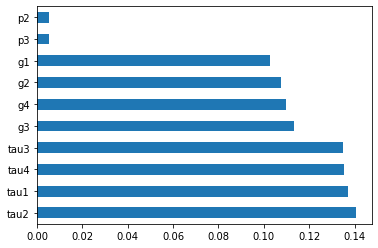

In [36]:
# Graph of feature importance
feat_importance = pd.Series(tuned_tree.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()